## Descriptive Analysis

In [1]:
import pandas as pd 

In [2]:
ratings_df = pd.read_csv('data/matched_beer_data/ratings.csv', header=1)
users_df = pd.read_csv('data/matched_beer_data/users.csv', header=1)
beers_df = pd.read_csv('data/matched_beer_data/beers.csv', header=1)
breweries_df = pd.read_csv('data/matched_beer_data/breweries.csv', header=1)

In [3]:
len(ratings_df)

21964

In [4]:
# separate the dataframe into two dataframes
ratings_df_1 = ratings_df[['abv', 'appearance', 'aroma', 'beer_id', 'beer_name', 'brewery_id',
       'brewery_name', 'date', 'overall', 'palate', 'rating', 'review',
       'style', 'taste', 'text', 'user_id', 'user_name']]

ratings_df_2 = ratings_df[['abv.1',
       'appearance.1', 'aroma.1', 'beer_id.1', 'beer_name.1', 'brewery_id.1',
       'brewery_name.1', 'date.1', 'overall.1', 'palate.1', 'rating.1',
       'style.1', 'taste.1', 'text.1', 'user_id.1', 'user_name.1']]

In [5]:
ratings_df_1.drop(['review'], axis=1, inplace=True)

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_16414/3142793656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_df_1.drop(['review'], axis=1, inplace=True)


In [6]:
# rename columns of ratings_df_2
ratings_df_2.columns = ['abv', 'appearance', 'aroma', 'beer_id', 'beer_name', 'brewery_id',
       'brewery_name', 'date', 'overall', 'palate', 'rating', 'style', 'taste',
       'text', 'user_id', 'user_name']

In [7]:
ratings_df = pd.concat([ratings_df_1, ratings_df_2])

In [8]:
ratings_df

,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,style,taste,text,user_id,user_name
0,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,4.80,Quadrupel (Quad),5.0,Best before 27.07.2016Directly reviewed in com...,erzengel.248045,Erzengel
1,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,3.00,American Adjunct Lager,NaN,NaN,visionthing.639993,visionthing
2,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,3.85,Lambic - Fruit,4.0,"Bottle @ One Pint Pub, Helsinki. 2006 vintage....",tiong.608427,tiong
3,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,3.68,Lambic - Unblended,3.5,"Originally rated on 16.11.2009, draught @ Pikk...",tiong.608427,tiong
4,6.0,4.0,4.0,81125,Drie Fonteinen Oude Geuze - Armand & Tommy,2216,Brouwerij 3 Fonteinen,1346234400,4.0,4.0,4.00,Gueuze,4.0,"750ml bottle, originally rated on 18.8.2012.Bo...",tiong.608427,tiong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21959,8.5,4.0,7.0,56990,Contreras Valeir Divers,1954,Contreras,1323946800,15.0,4.0,3.70,Abbey Tripel,7.0,Valeir Divers 33cl bottle from www.belgianbeer...,137922,TheBeerWatcher
21960,8.0,4.0,8.0,7661,Fantôme Saison,1289,Brasserie Fantôme,1487502000,16.0,4.0,4.00,Saison,8.0,.................................................,394232,jonj
21961,5.2,5.0,3.0,8042,Jupiler,2004,Brasserie Piedboeuf (InBev),1393153200,1.0,1.0,1.20,Pale Lager,2.0,"Biere, foin, pain grillÃ©, terreux, banane, ca...",304802,maxilouis
21962,6.5,3.0,8.0,248989,dOude Maalderij Redenaar,15326,dOude Maalderij,1397037600,17.0,3.0,3.90,Belgian Ale,8.0,This is the first blond ale from this brewery....,276666,simoen


In [9]:
ratings_df.rating.describe()

count    43928.000000
mean         3.635926
std          0.575515
min          0.500000
25%          3.300000
50%          3.700000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

In [10]:
ratings_df.isnull().sum()

abv                0
appearance      2669
aroma           2669
beer_id            0
beer_name          0
brewery_id         0
brewery_name       0
date               0
overall         2669
palate          2669
rating             0
style              0
taste           2669
text            3686
user_id            0
user_name          0
dtype: int64

In [11]:
# drop duplicates
ratings_df.drop_duplicates(inplace=True)

In [12]:
len(ratings_df)

43928

There are exactly 43,928 unique reviews

In [13]:
unique_users_rated = ratings_df['user_id'].unique()
print(len(unique_users_rated))

1758


There are exactly 1758 unique users that have rated 

In [14]:
# group by user_id and count the number of ratings per user
user_ratings_count = ratings_df.groupby('user_id')['user_id'].count()

# sort the values in descending order
user_ratings_count.sort_values(ascending=False, inplace=True)

user_ratings_count

user_id
11905                1784
sammy.3853           1784
60182                 801
johnnnniee.125029     801
superspak.456300      767
                     ... 
220710                  1
jesterdeal.573538       1
jethro6191.372379       1
jhamp9.718935           1
0110x011.201955         1
Name: user_id, Length: 1758, dtype: int64

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_16414/3886357010.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_df['rating'], hist=False)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fut

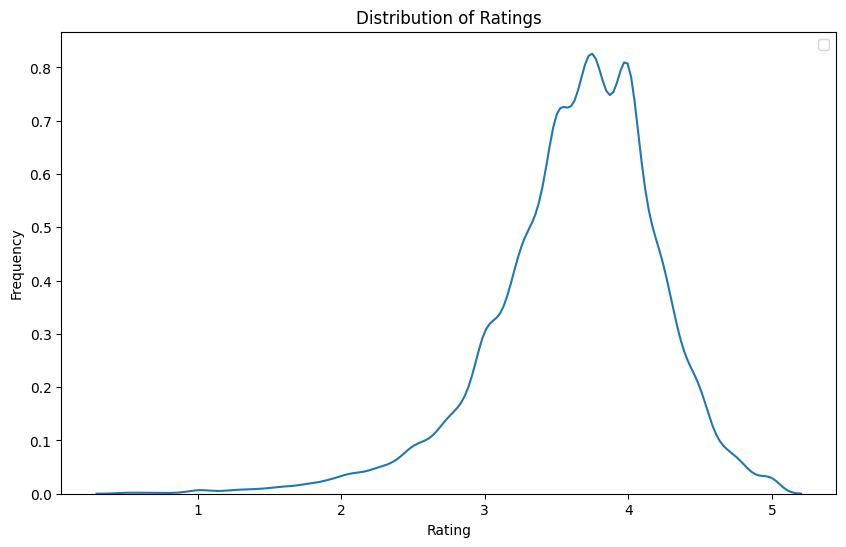

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.distplot(ratings_df['rating'], hist=False)
    
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.legend()

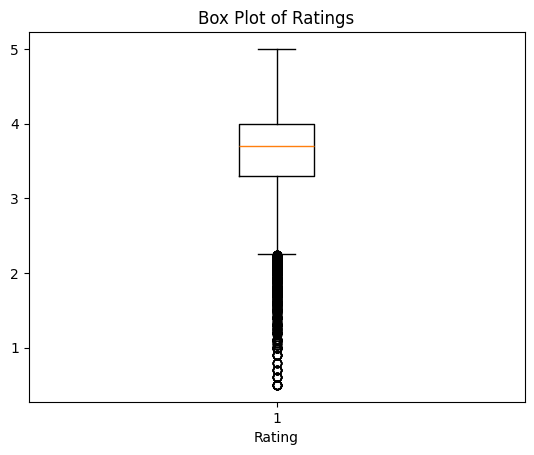

In [16]:
plt.boxplot(ratings_df['rating'])

plt.xlabel('Rating')
plt.title('Box Plot of Ratings')

plt.show()


### Users analysis 

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_16414/66582002.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_ratings_count, kde=False, bins=100)


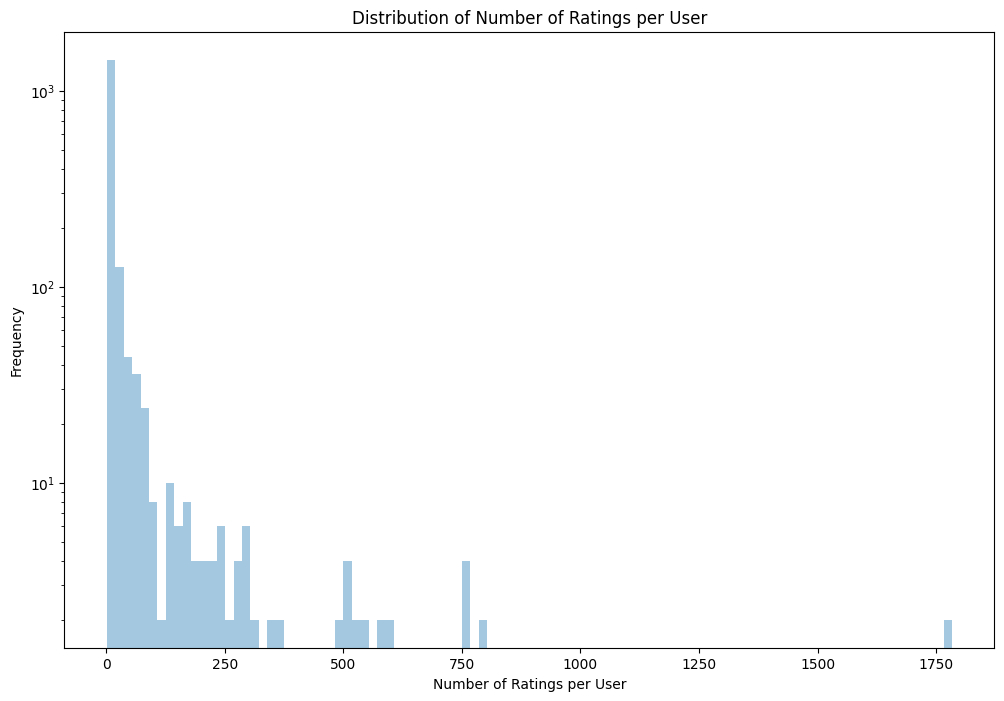

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the distribution of the number of ratings per user with a log scale
plt.figure(figsize=(12,8))
sns.distplot(user_ratings_count, kde=False, bins=100)
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Ratings per User')
plt.yscale('log')
plt.show()

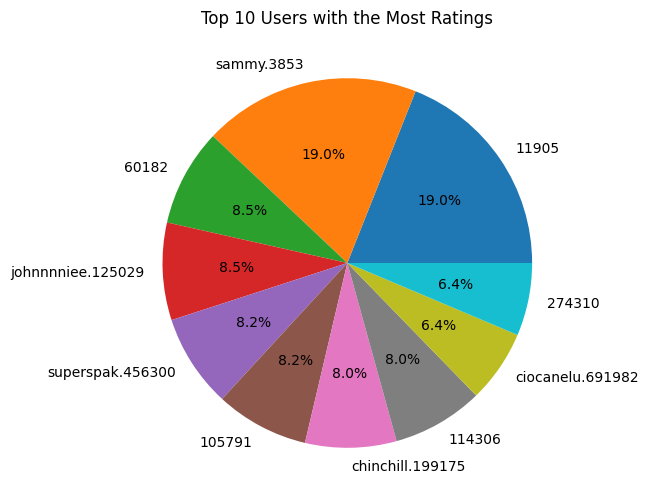

In [18]:
# plot pie chart of the top 10 users with the most ratings
plt.figure(figsize=(6,6))
plt.pie(user_ratings_count[:10], labels=user_ratings_count[:10].index, autopct='%1.1f%%')
plt.title('Top 10 Users with the Most Ratings')
plt.show()

In [19]:
users_df.head()

,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined.1,location.1,nbr_ratings.1,user_id.1,user_name.1,user_name_lower.1
0,1.220868e+09,Germany,6,6,erzengel.248045,Erzengel,erzengel,1.224324e+09,Germany,8781,83106,Erzengel,erzengel
1,1.348394e+09,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1.385723e+09,"United States, Virginia",6240,290599,GenDV138,gendv138
2,1.207303e+09,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1.150798e+09,"United States, Washington",7452,38859,nimbleprop,nimbleprop
3,1.322737e+09,Estonia,11,0,visionthing.639993,visionthing,visionthing,1.242986e+09,Estonia,5462,91324,visionthing,visionthing
4,1.432116e+09,England,1,0,lazypyro.989356,LazyPyro,lazypyro,1.431166e+09,England,1096,368991,LazyPyro,lazypyro


In [20]:
users_df_1 = users_df[['joined', 'location', 'nbr_ratings', 'nbr_reviews', 'user_id',
       'user_name', 'user_name_lower']]

users_df_2 = users_df[['joined.1', 'location.1',
       'nbr_ratings.1', 'user_id.1', 'user_name.1', 'user_name_lower.1']]

In [21]:
users_df_1.drop(['nbr_reviews'], axis=1, inplace=True)

# rename columns of users_df_2
users_df_2.columns = ['joined', 'location', 'nbr_ratings', 'user_id',
       'user_name', 'user_name_lower']

users_df = pd.concat([users_df_1, users_df_2])

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_16414/3653305372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df_1.drop(['nbr_reviews'], axis=1, inplace=True)


In [22]:
users_df = users_df[['location', 'user_id']]
users_df.columns = ['user_location', 'user_id']

In [23]:
# join ratings_df and users_df
ratings_users_df = pd.merge(ratings_df, users_df, on='user_id', how='left')

In [24]:
# create new column named user_country and extract the country from user_location
ratings_users_df['user_country'] = ratings_users_df['user_location'].str.split(',').str[0]

In [25]:
# group by user_location and count the number of ratings per user_location
user_country_ratings_count = ratings_users_df.groupby('user_country')['user_country'].count()

# sort the values in descending order
user_country_ratings_count.sort_values(ascending=False, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'England'),
  Text(3, 0, 'Romania'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Sweden'),
  Text(6, 0, 'Norway'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Netherlands'),
  Text(9, 0, 'Brazil')])

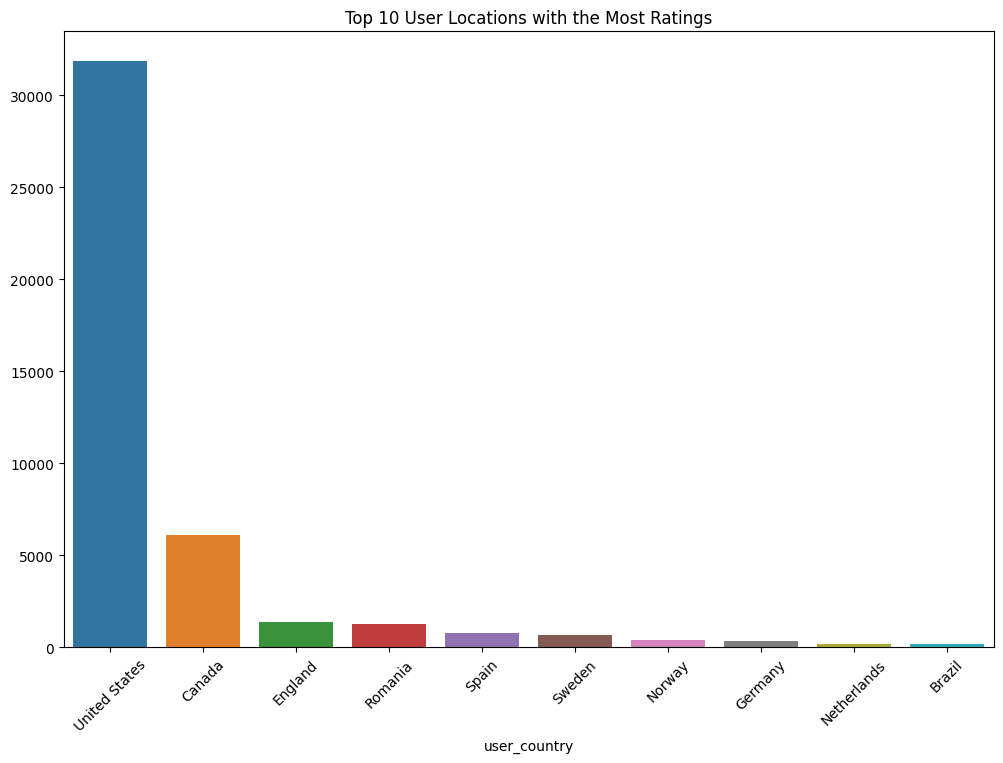

In [26]:
# plot the 10 user_locations with the most ratings
plt.figure(figsize=(12,8))
sns.barplot(x=user_country_ratings_count[:10].index, y=user_country_ratings_count[:10].values)
plt.title('Top 10 User Locations with the Most Ratings')
plt.xticks(rotation=45)

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_16414/2214312342.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_users_df[ratings_users_df['user_country']==country]['rating'], kde=False, bins=100, label=country)


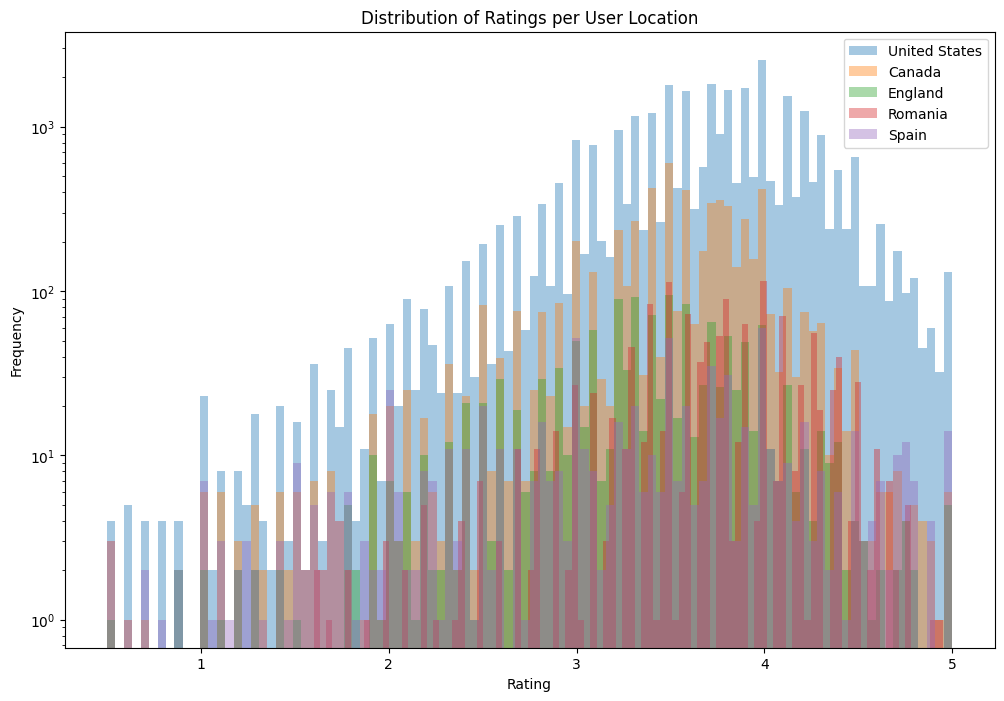

In [27]:
plt.figure(figsize=(12,8))

for country in user_country_ratings_count[:5].index:
    sns.distplot(ratings_users_df[ratings_users_df['user_country']==country]['rating'], kde=False, bins=100, label=country)
    
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings per User Location')
plt.yscale('log')
plt.legend()


/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_16414/240833517.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_users_df[ratings_users_df['user_country']==country]['rating'], hist=False, label=country)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: 

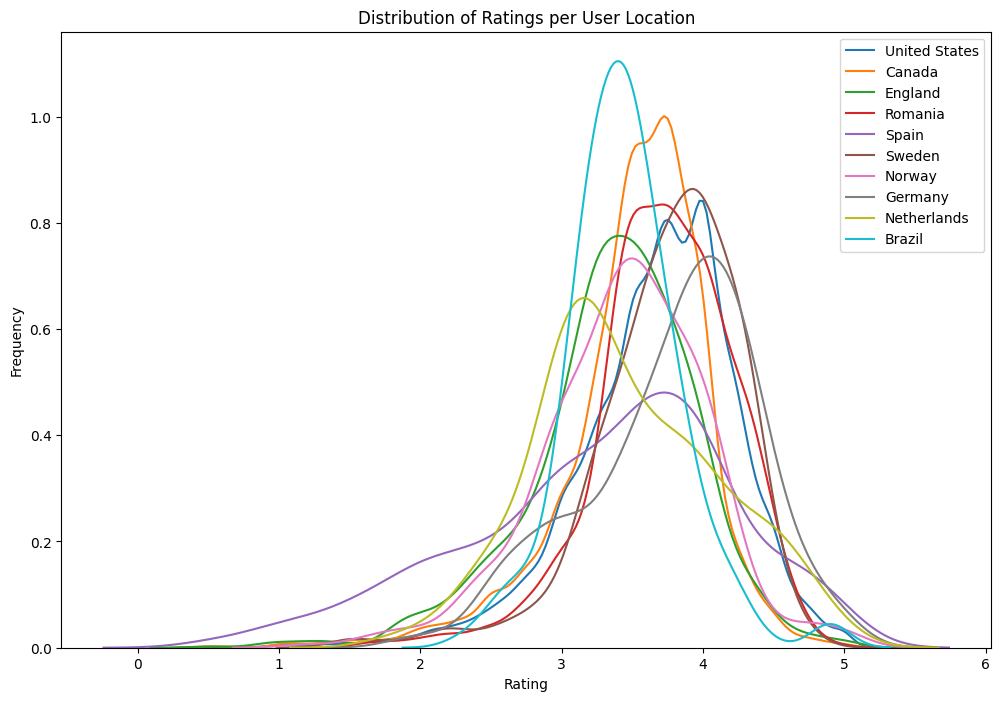

In [28]:
plt.figure(figsize=(12,8))

for country in user_country_ratings_count[:10].index:
    sns.distplot(ratings_users_df[ratings_users_df['user_country']==country]['rating'], hist=False, label=country)
    
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings per User Location')
plt.legend()


## Analysis of ratings through time

In [29]:
# transform date column to datetime format
ratings_users_df['date'] = pd.to_datetime(ratings_users_df['date'], unit='s')

In [30]:
ratings_users_df.head()

,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,style,taste,text,user_id,user_name,user_location,user_country
0,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,2011-12-25 11:00:00,5.0,4.5,4.80,Quadrupel (Quad),5.0,Best before 27.07.2016Directly reviewed in com...,erzengel.248045,Erzengel,Germany,Germany
1,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,2011-11-30 11:00:00,NaN,NaN,3.00,American Adjunct Lager,NaN,NaN,visionthing.639993,visionthing,Estonia,Estonia
2,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,2012-08-04 10:00:00,4.0,4.0,3.85,Lambic - Fruit,4.0,"Bottle @ One Pint Pub, Helsinki. 2006 vintage....",tiong.608427,tiong,Finland,Finland
3,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,2012-08-04 10:00:00,4.0,4.0,3.68,Lambic - Unblended,3.5,"Originally rated on 16.11.2009, draught @ Pikk...",tiong.608427,tiong,Finland,Finland
4,6.0,4.0,4.0,81125,Drie Fonteinen Oude Geuze - Armand & Tommy,2216,Brouwerij 3 Fonteinen,2012-08-29 10:00:00,4.0,4.0,4.00,Gueuze,4.0,"750ml bottle, originally rated on 18.8.2012.Bo...",tiong.608427,tiong,Finland,Finland


In [31]:
mean_rating = ratings_users_df.rating.mean()

# label from 0 to 5 the ratings as follows: if between 4 and 5, then label 5, if between 3 and 4, then label 4, etc.
ratings_users_df['rating_label'] = ratings_users_df['rating'].apply(lambda x: 5 if x >= 4 else (4 if x >= 3 else (3 if x >= 2 else (2 if x >= 1 else (1 if x >= 0 else 0)))))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


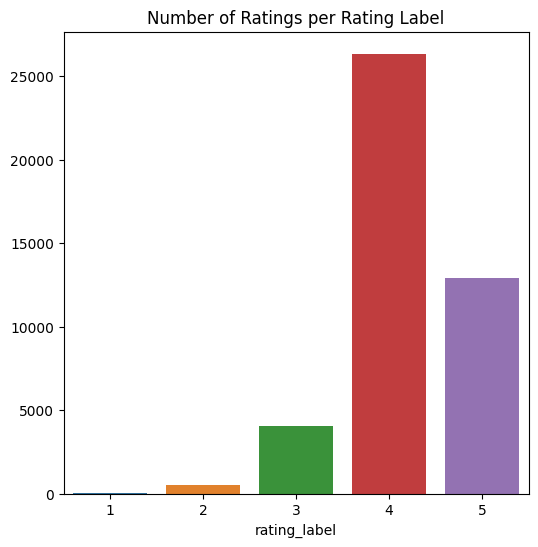

In [32]:
# count the number of ratings per rating_label
ratings_label_count = ratings_users_df.groupby('rating_label')['rating_label'].count()

# plot as bar chart the number of ratings per rating_label
plt.figure(figsize=(6,6))
sns.barplot(x=ratings_label_count.index, y=ratings_label_count.values)
plt.title('Number of Ratings per Rating Label')
plt.show()

In [33]:
# extract the year and month from date
ratings_users_df['year'] = ratings_users_df['date'].dt.year
ratings_users_df['month'] = ratings_users_df['date'].dt.month

# create new column named year_month
ratings_users_df['year_month'] = ratings_users_df['year'].astype(str) + '-' + ratings_users_df['month'].astype(str)

# transform year_month column to datetime format
ratings_users_df['year_month'] = pd.to_datetime(ratings_users_df['year_month'])

## Yearly analysis

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

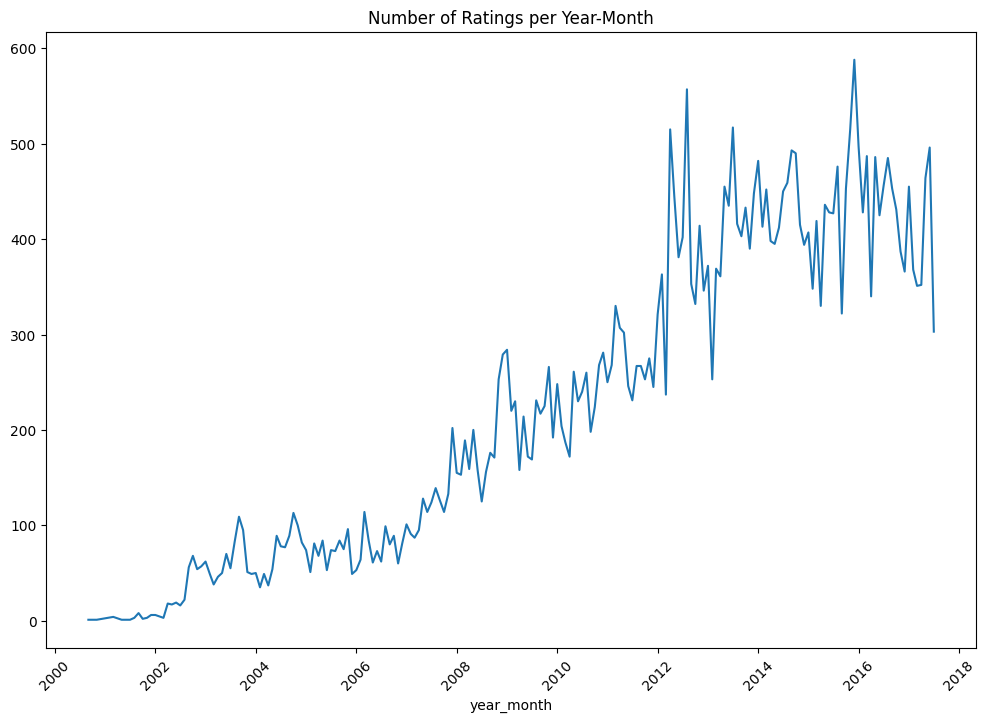

In [34]:
# group by year_month and count the number of ratings per year_month
year_month_ratings_count = ratings_users_df.groupby('year_month')['year_month'].count()

# plot as line chart the number of ratings per year_month
plt.figure(figsize=(12,8))
sns.lineplot(x=year_month_ratings_count.index, y=year_month_ratings_count.values)
plt.title('Number of Ratings per Year-Month')
plt.xticks(rotation=45)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

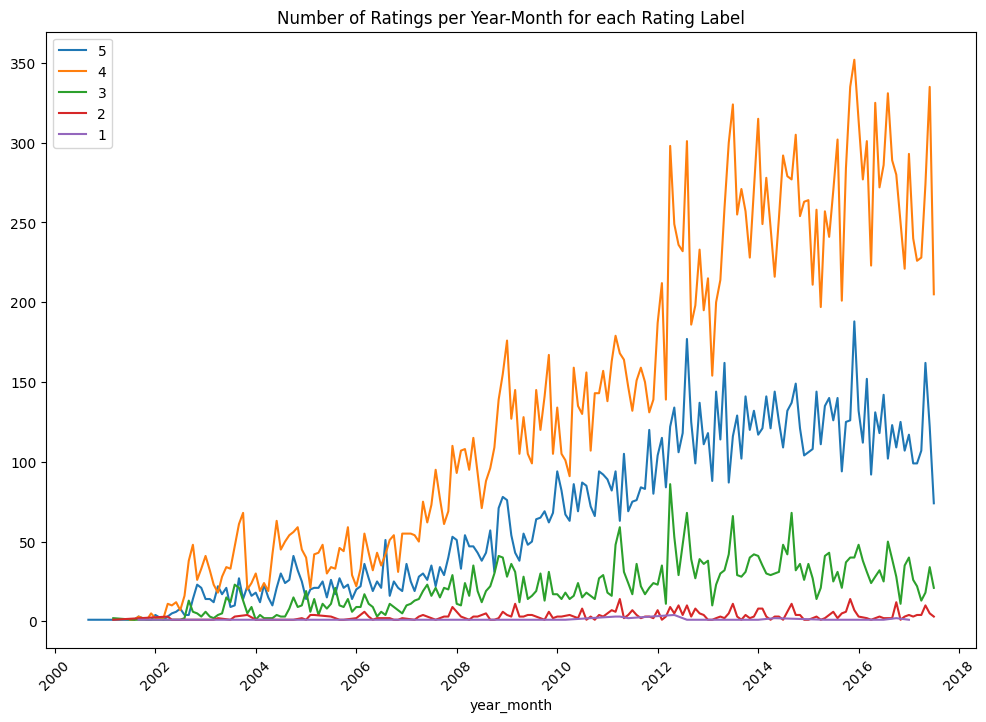

In [35]:
# line plot of the number of ratings per year-month for each rating_label
plt.figure(figsize=(12,8))

for label in ratings_users_df['rating_label'].unique():
    sns.lineplot(x=ratings_users_df[ratings_users_df['rating_label']==label].groupby('year_month')['year_month'].count().index, y=ratings_users_df[ratings_users_df['rating_label']==label].groupby('year_month')['year_month'].count().values, label=label)
    
plt.title('Number of Ratings per Year-Month for each Rating Label')
plt.xticks(rotation=45)
plt.legend()


We observe lots of variations during the years. This might indicate that there could be seasonality in the data. 
Thus, we plot the number of ratings monthly. 

In [36]:
# create new dataframe with only the columns needed from year_month_ratings_count
year_month_ratings_count = pd.DataFrame(year_month_ratings_count.index)
year_month_ratings_count.columns = ['year_month']
year_month_ratings_count['nbr_ratings'] = ratings_users_df.groupby('year_month')['year_month'].count().values

# create new column named year
year_month_ratings_count['year'] = year_month_ratings_count['year_month'].dt.year

# create new column named month
year_month_ratings_count['month'] = year_month_ratings_count['year_month'].dt.month

In [37]:
# plot with plotly the number of ratings per year_month
import plotly.express as px

fig = px.line(x=year_month_ratings_count.month, y=year_month_ratings_count.nbr_ratings, color=year_month_ratings_count.year, title='Number of Ratings per Month')
fig.update_xaxes(title_text='Year-Month')
fig.update_yaxes(title_text='Number of Ratings')
fig.show()


In [38]:
import plotly.express as px
import plotly.graph_objects as go 

year_month_ratings_count_2012 = year_month_ratings_count[year_month_ratings_count['year'] >= 2012]

# Compute mean number of ratings per month
mean_nbr_ratings_2012 = year_month_ratings_count_2012.groupby('month')['nbr_ratings'].mean()

fig = px.line(x=year_month_ratings_count_2012.month, y=year_month_ratings_count_2012.nbr_ratings, color=year_month_ratings_count_2012.year, title='Number of Ratings per Month (from 2012)')

fig.add_trace(go.Scatter(x=year_month_ratings_count_2012.month, y=mean_nbr_ratings_2012.values, mode='lines', name='Mean Number of Ratings', line=dict(color='black', dash='dash', width=4)))

fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Number of Ratings')
fig.show()


We don't have informations about ratings after the 7th month of the year 2017 : 
* either we compare by comparing months until 7th 
* or we simply discard the year 2017 from the analysis 

In [39]:
year_month_ratings_count_2012_2017 = year_month_ratings_count[(year_month_ratings_count['year'] >= 2012) & (year_month_ratings_count['year'] < 2017)]

# Compute mean number of ratings per month
mean_nbr_ratings_2012_2017 = year_month_ratings_count_2012_2017.groupby('month')['nbr_ratings'].mean()

fig = px.line(x=year_month_ratings_count_2012_2017.month, y=year_month_ratings_count_2012_2017.nbr_ratings, color=year_month_ratings_count_2012_2017.year, title='Number of Ratings per Month (from 2012 to 2017 excl.)')

fig.add_trace(go.Scatter(x=year_month_ratings_count_2012_2017.month, y=mean_nbr_ratings_2012_2017.values, mode='lines', name='Mean Number of Ratings', line=dict(color='black', dash='dash', width=4)))

fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Number of Ratings')
fig.show()